# House price Dataset - Feature engineering & Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load dataset

df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

In [4]:
print(df.shape)

(1460, 81)


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 1. Handling Missing Data

## Step 1 : Analysing Missing Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [10]:
# !pip install missingno

In [11]:
import missingno as msno

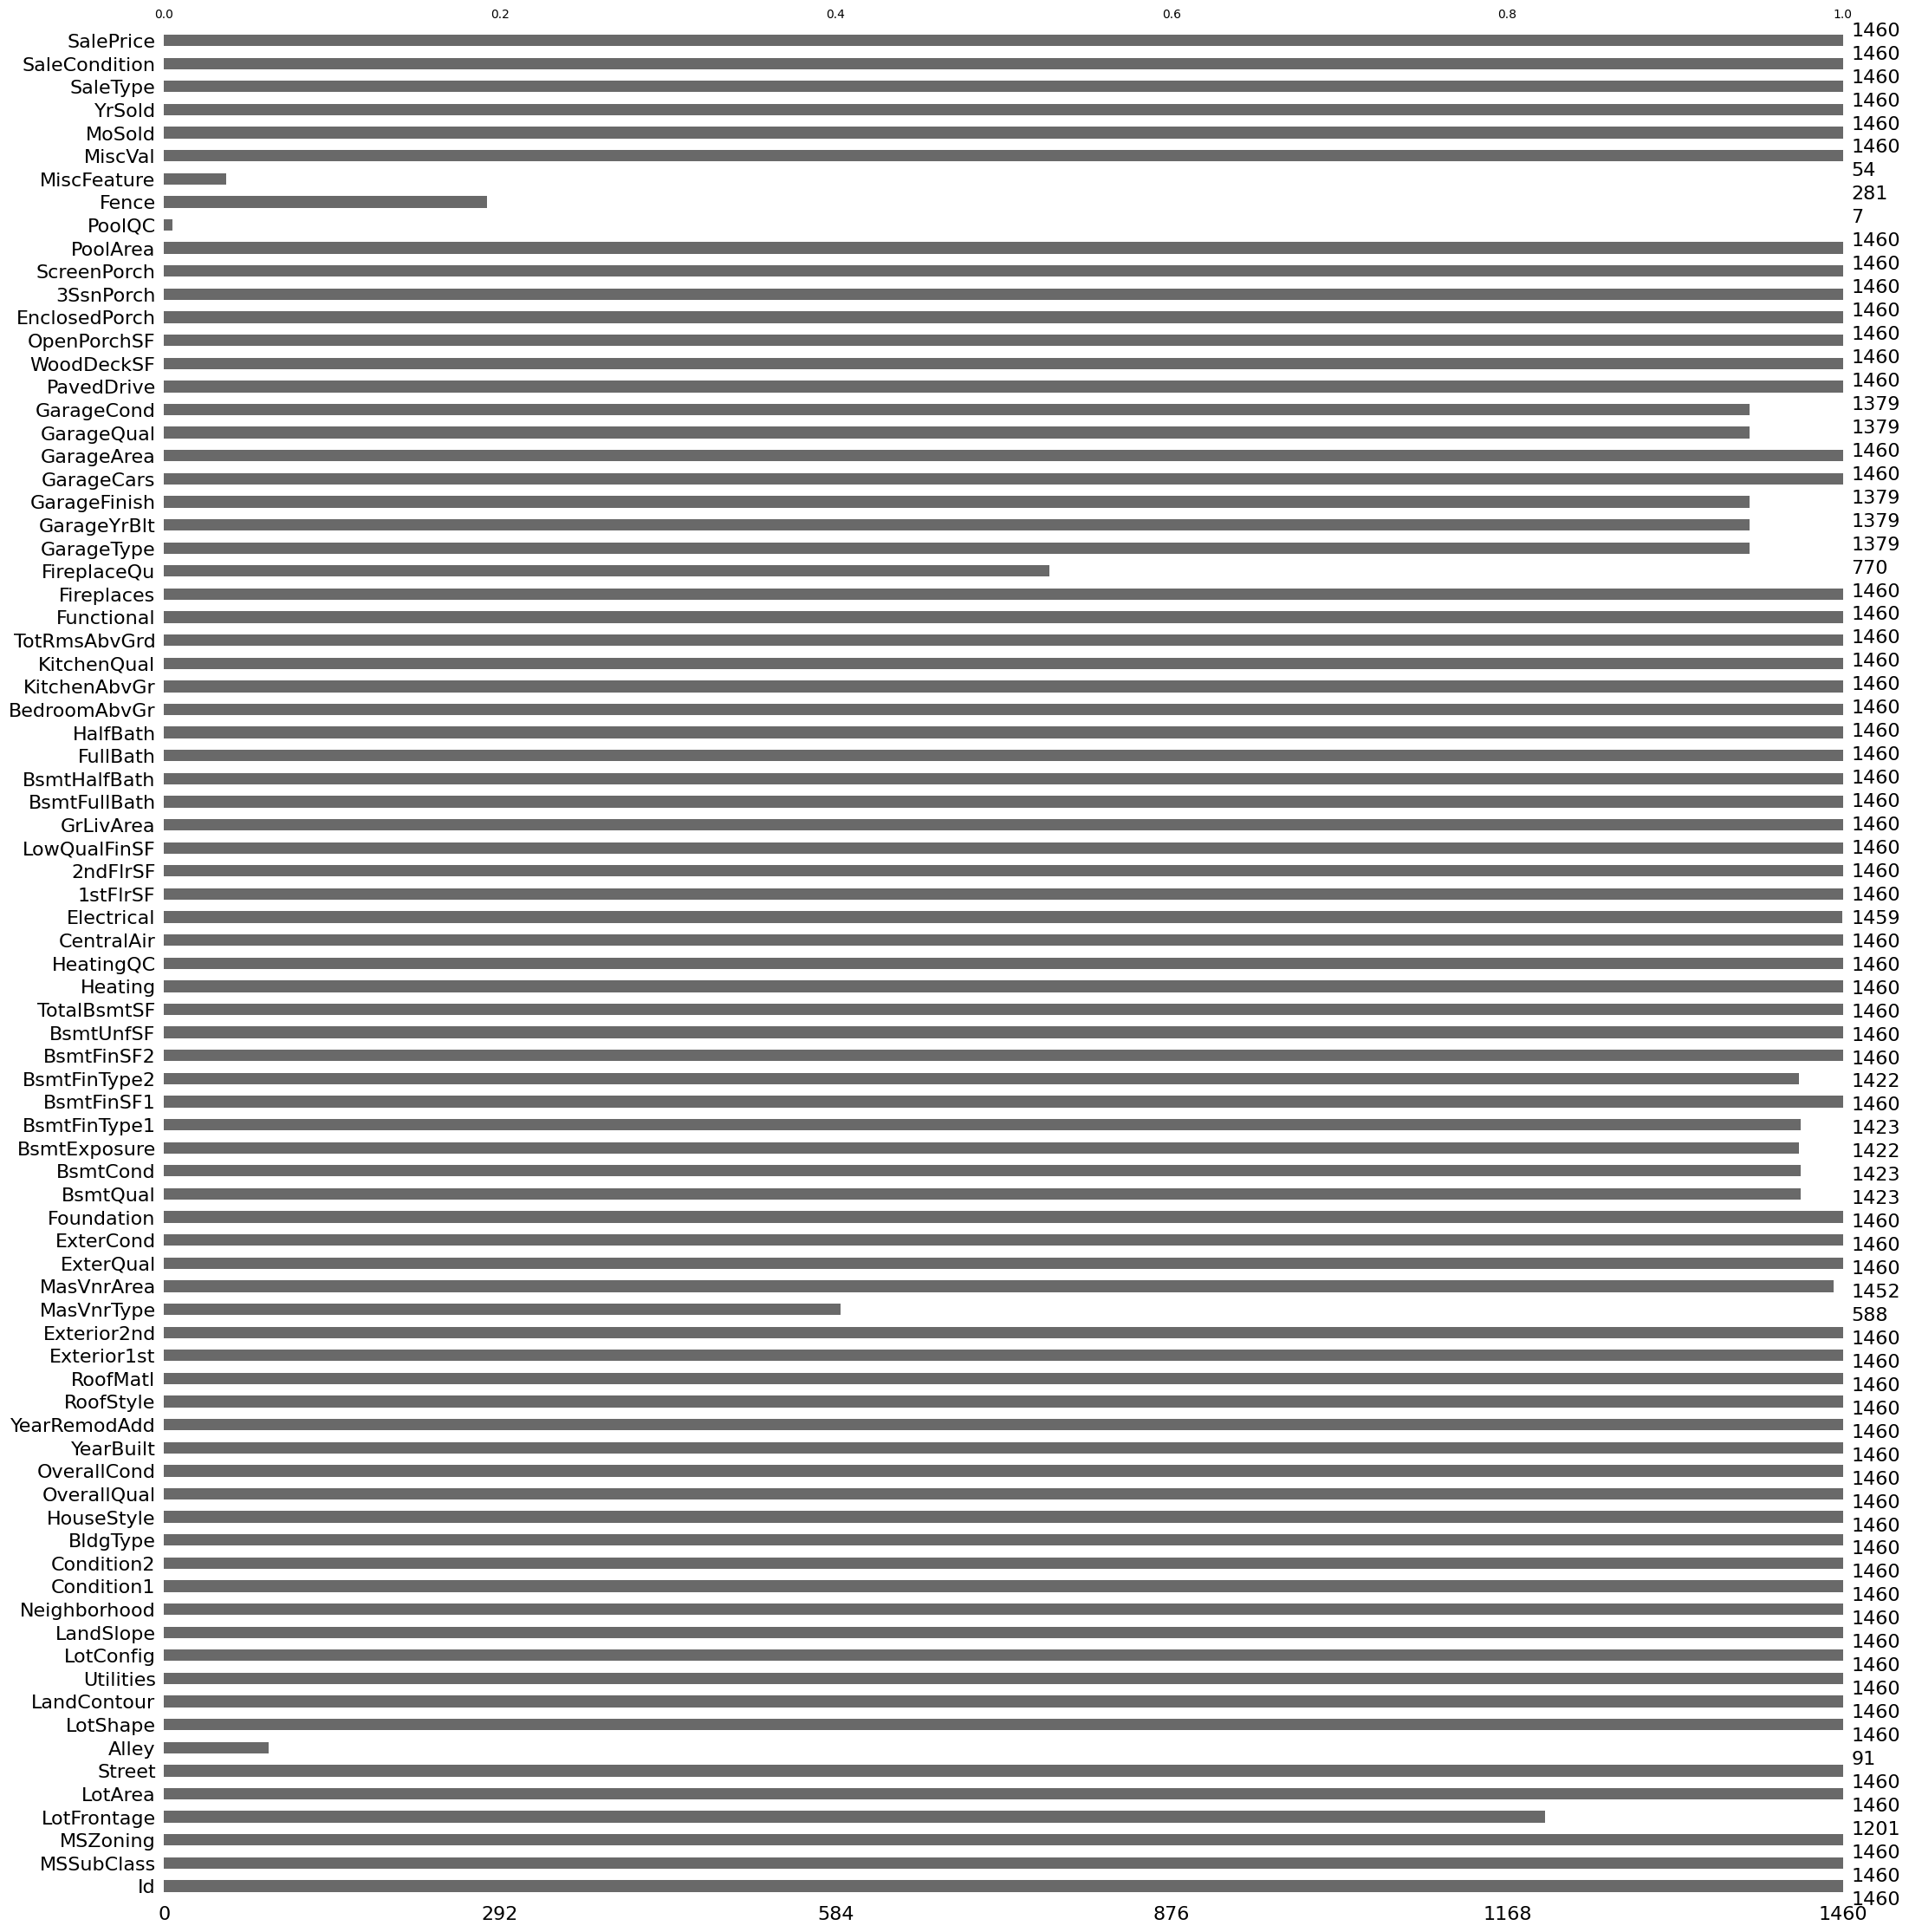

In [ ]:
plt.figure(figsize=(12, 6))
msno.bar(df)
plt.show()

# Shows how much data is missing column-wise
# long-bars = complete data
# short-bars = lots of missing values

<Figure size 1200x600 with 0 Axes>

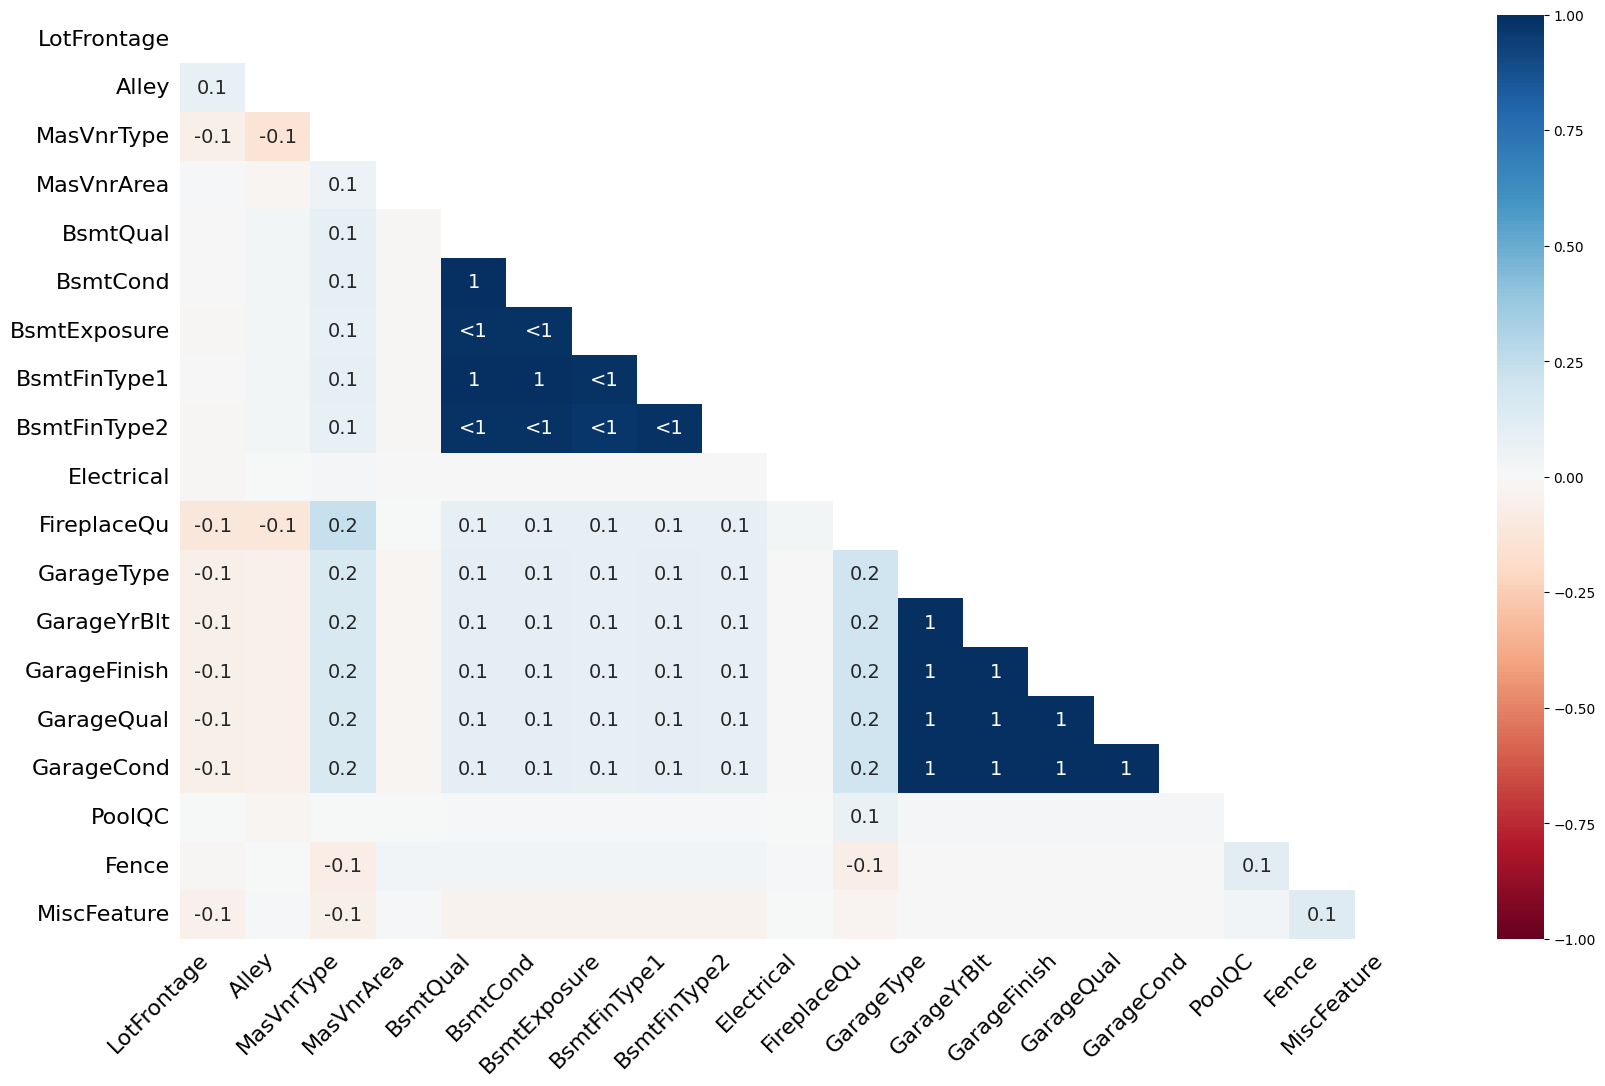

In [ ]:
plt.figure(figsize=(12, 6))
msno.heatmap(df)
plt.show()

# values close to 1 = two columns tend to be missing together - present, marks
# values close to 0 = no relationship
# values negative = if one missing, the other is usually present - name, present

# class-test [name, present, marks]

# Case 1 : If person is not present, will they have their name in register ? 
# - negative case, large negative value - (name, present), (name, marks)

# Case 2 : If person is present, will they have score in the marksheet?
# - Absent, they will not have score (present, marks)



# Step 2 - Deletion method

In [14]:
# listwise deletion (Case deletion)
df_listwise = df.dropna()
print("Original Shape : ", df.shape)
print("After listwise deletion Shape : ", df_listwise.shape)

Original Shape :  (1460, 81)
After listwise deletion Shape :  (0, 81)


# Step 3 - Simple Imputation

Instead of deleting, we fill missing values with estimates.

In [20]:
# Function to check before and after of imputation

def compare_imputation(df_before, df_after, column_name):
    missing_indices = {column_name : df_before[df_before[column_name].isnull()].index.to_list() for column_name in df_before.columns if df_before[column_name].isnull().any()}

    if column_name not in missing_indices:
        print(f"No missing values were found in column '{column_name}'")
        return

    idx_list = missing_indices[column_name]

    comparison = pd.DataFrame({
        "Before" : df_before.loc[idx_list,column_name], 
        "After" : df_after.loc[idx_list,column_name], 
    })

    print(f"Changes in column : {column_name}")
    return comparison



In [15]:
# (a) Mean inputation (numerical Data)

df_mean = df.copy()
df_mean['LotFrontage'].fillna(df_mean['LotFrontage'].mean(), inplace=True)

C:\Users\scl\AppData\Local\Temp\ipykernel_2028\398266078.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['LotFrontage'].fillna(df_mean['LotFrontage'].mean(), inplace=True)


In [17]:
df_mean = df.copy()
df_mean.fillna({'LotFrontage': df_mean['LotFrontage'].mean()}, inplace=True)

In [21]:
compare_imputation(df, df_mean, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,70.049958
12,NaN,70.049958
14,NaN,70.049958
16,NaN,70.049958
24,NaN,70.049958
31,NaN,70.049958
42,NaN,70.049958
43,NaN,70.049958
50,NaN,70.049958
64,NaN,70.049958


In [22]:
# Issue with using mean : 
# it will pull the distribution towards mean
# underestimate spread

In [23]:
# (b) median imputation (numerical data)
# house - 500K, 750K, 400K, 10M

df_median = df.copy()
df_median.fillna({'LotFrontage': df_median['LotFrontage'].median()}, inplace=True)

In [24]:
compare_imputation(df, df_median, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,69.0
12,NaN,69.0
14,NaN,69.0
16,NaN,69.0
24,NaN,69.0
31,NaN,69.0
42,NaN,69.0
43,NaN,69.0
50,NaN,69.0
64,NaN,69.0


In [ ]:
# (c) mode imputation (cetogorial data)
# house - 90% of the house are in URBAN area, 10%

In [27]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [30]:
df_mode = df.copy()
df_mode.fillna({'GarageType': df_mode['GarageType'].mode()[0]}, inplace=True)

In [35]:
df_mode['GarageType'].mode()[0]

'Attchd'

In [31]:
compare_imputation(df, df_mode, "GarageType").head(10)

Changes in column : GarageType


,Before,After
39,NaN,Attchd
48,NaN,Attchd
78,NaN,Attchd
88,NaN,Attchd
89,NaN,Attchd
99,NaN,Attchd
108,NaN,Attchd
125,NaN,Attchd
127,NaN,Attchd
140,NaN,Attchd


In [36]:
import seaborn as sns

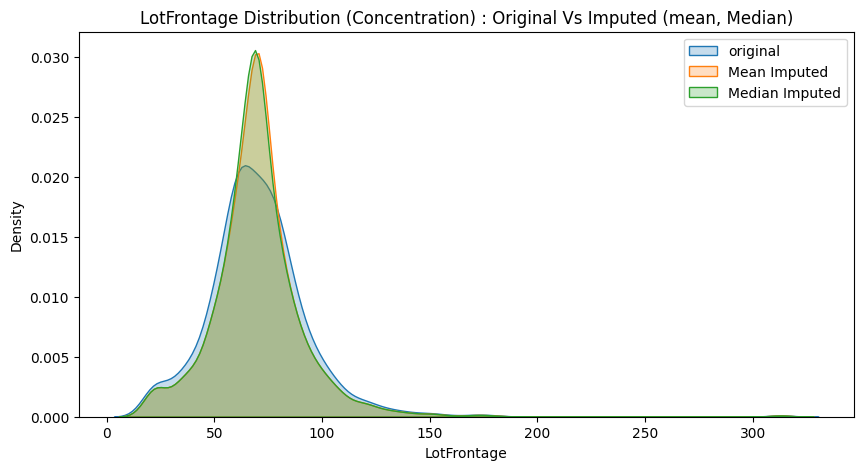

In [38]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['LotFrontage'], label="original", fill=True)
sns.kdeplot(df_mean['LotFrontage'], label="Mean Imputed", fill=True)
sns.kdeplot(df_median['LotFrontage'], label="Median Imputed", fill=True)
plt.legend()
plt.title("LotFrontage Distribution (Concentration) : Original Vs Imputed (mean, Median)")
plt.show()

In [ ]:
# Is density interpreted as probability here? NO, they are not equal : PDF, PMF, CDF

# Step 4 : KNN Imputation

In [40]:
# !pip install scikit-learn

In [42]:
from sklearn.impute import KNNImputer

In [43]:
knn_inputer = KNNImputer(n_neighbors=5)

In [46]:
df_knn = df.copy()
columns = ['LotFrontage', 'LotArea', 'YearBuilt']
df_knn[columns] = knn_inputer.fit_transform(df_knn[columns])

In [54]:
compare_imputation(df, df_knn, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,80.2
12,NaN,86.8
14,NaN,67.0
16,NaN,75.4
24,NaN,60.2
31,NaN,66.4
42,NaN,83.6
43,NaN,75.8
50,NaN,96.2
64,NaN,80.2


In [52]:
df_knn_2 = df.copy()
numeric_cols = df_knn_2.select_dtypes(include=[np.number]).columns
df_knn_2[numeric_cols] = knn_inputer.fit_transform(df_knn_2[numeric_cols])

In [53]:
compare_imputation(df, df_knn_2, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,75.6
12,NaN,76.6
14,NaN,75.2
16,NaN,90.2
24,NaN,66.0
31,NaN,67.6
42,NaN,77.0
43,NaN,63.0
50,NaN,68.6
64,NaN,76.4
